## Data Augmentation on the Horses or Humans Dataset

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-10-02 13:12:19--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.20.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   267MB/s    in 0.5s    

2023-10-02 13:12:20 (267 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]

--2023-10-02 13:12:20--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.20.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M

In [2]:
import os
import zipfile

zip_ref = zipfile.ZipFile('./horse-or-human.zip', 'r')
zip_ref.extractall('tmp/horse-or-human')

zip_ref = zipfile.ZipFile('./validation-horse-or-human.zip', 'r')
zip_ref.extractall('tmp/validation-horse-or-human')

zip_ref.close()

train_horse_dir = os.path.join('tmp/horse-or-human/horses')

train_human_dir = os.path.join('tmp/horse-or-human/humans')

validation_horse_dir = os.path.join('tmp/validation-horse-or-human/horses')

validation_human_dir = os.path.join('tmp/validation-horse-or-human/humans')

In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [4]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
        'tmp/horse-or-human/',
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        'tmp/validation-horse-or-human/',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [6]:
EPOCHS = 20

history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=EPOCHS,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/20
8/8 [==============================] - 35s 3s/step - loss: 0.6936 - accuracy: 0.5139 - val_loss: 0.6870 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 24s 3s/step - loss: 0.6887 - accuracy: 0.5184 - val_loss: 0.6831 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 26s 3s/step - loss: 0.6853 - accuracy: 0.5406 - val_loss: 0.6832 - val_accuracy: 0.5000
Epoch 4/20
8/8 [==============================] - 27s 3s/step - loss: 0.6854 - accuracy: 0.5384 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 5/20
8/8 [==============================] - 25s 3s/step - loss: 0.6769 - accuracy: 0.5551 - val_loss: 0.7008 - val_accuracy: 0.5000
Epoch 6/20
8/8 [==============================] - 24s 3s/step - loss: 0.6732 - accuracy: 0.5417 - val_loss: 0.6673 - val_accuracy: 0.5039
Epoch 7/20
8/8 [==============================] - 25s 3s/step - loss: 0.6622 - accuracy: 0.6507 - val_loss: 0.6469 - val_accuracy: 0.5312
Epoch 8/20
8/8 [==================

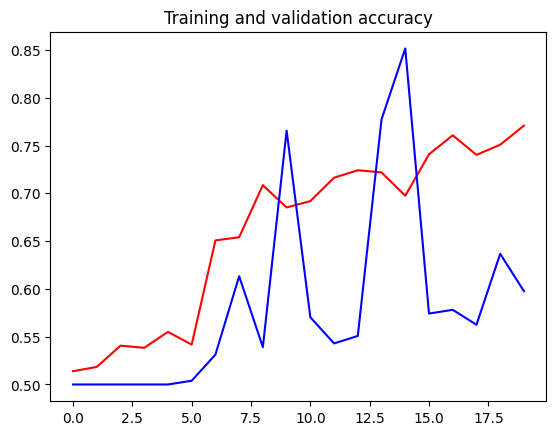

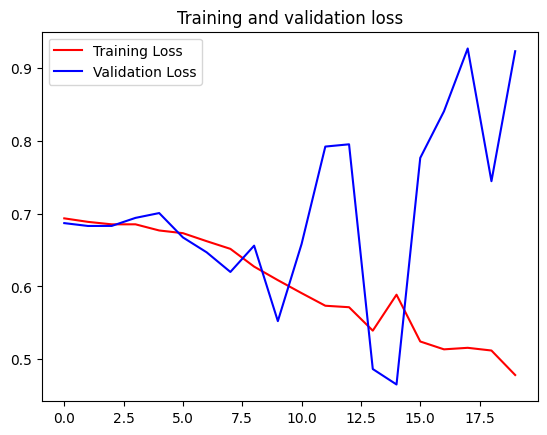

In [7]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()